In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

In [2]:
file = '/media/mathilde/MELD2/MELD2/DATA/MELD_H4/MELDProjectFocalEpil_REDCAPDATA_H4_230516.csv'


In [3]:
df = pd.read_csv(file)
df

,id,hospital_number,First Name,Second Name,old_id,MELD_FCD_ID,redcap_data_access_group,site,patient_control,sex,...,seizure_free,seizure_free_aura,engel_1yr,ilae_1yr,engel,ilae,follow_up,aeds_post_op,participant_information_complete,what still need to be retrieved
0,MELD_H4_P_0001,1030556.0,Joe,Collinson,sub-02,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MELD_H4_P_0002,790842.0,Erin,Green,sub-03,NaN,NaN,H4,1.0,1.0,...,1,not_applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MELD_H4_P_0003,1063242.0,Matthew,Balls,sub-05,NaN,NaN,H4,1.0,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MELD_H4_P_0004,1038160.0,Charlie,Francis,sub-06,NaN,NaN,H4,1.0,0.0,...,0,not_applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MELD_H4_P_0005,1043233.0,Mallika,Wisniewska,sub-07,NaN,NaN,H4,1.0,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MELD_H4_P_0231,939611.0,Alicia,Smith,sub-148,NaN,NaN,H4,1.0,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,MELD_H4_P_0232,901563.0,Jak,Milligan,sub-453,NaN,NaN,H4,1.0,0.0,...,no_outcome,no_outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.keys()

Index(['id', 'hospital_number', 'First Name', 'Second Name', 'old_id',
       'MELD_FCD_ID', 'redcap_data_access_group', 'site', 'patient_control',
       'sex', 'radiology', 'radiology_report', 'included',
       'Reason for exclusion', 'field_strengths___1', 'field_strengths___2',
       'field_strengths___3', 'field_strengths___unk', 'field_strengths___na',
       'age_at_preop_t1_15t', 'age_at_preop_t1_3t', 'age_at_preop_t1_7t',
       'preop_t1_yr_15t', 'preop_t1_yr_3t', 'preop_t1_yr_7t', 'postop_t1_yr',
       'postop_t1_yr_2___1', 'postop_t1_yr_2___2', 'postop_t1_yr_2___3',
       'postop_t1_yr_2___unk', 'postop_t1_yr_2___na', 'control_headache',
       'preop_t1', 'preop_t2', 'preop_flair', 'preop_dwi', 'postop_t1',
       'fields', 'lesion_mask', 'age_at_onset', 'gtcs', 'drug_resistant',
       'aeds', 'mri_negative', 'seeg', 'operated', 'surgery_date',
       'surgery_year', 'age_at_surgery', 'mri_negative_surgery', 'procedure',
       'procedure_other', 'hemi', 'histology', 

In [5]:
# take only subject included
df  = df[df['included']==1.0]
print(f'number of patient : {len(df)}')

number of patient : 130


# Analyse demographics

In [6]:
#Total subjects

num_subjects = len(df)

print('Number of subjects: {} patients'.format(num_subjects))

Number of subjects: 130 patients


In [7]:
# patients or controls

num_patients = len(df[df['patient_control']==1])
num_controls = len(df[df['patient_control']==0])

print('Group: {} patients - {} controls'.format(int(num_patients), int(num_controls)))

Group: 130 patients - 0 controls


In [8]:
#Age at scan

#combine age at scan - if multiple scans take 3T in priority
df['age_scan'] = df['age_at_preop_t1_3t']
df['age_scan'] = df['age_scan'].fillna(df['preop_t1_yr_7t'])
df['age_scan'] = df['age_scan'].fillna(df['preop_t1_yr_15t'])
# print(df['age_scan'].values)

mean_age = df['age_scan'].mean()
min_age = df['age_scan'].min()
max_age = df['age_scan'].max()

print('Age at preoperative scans range years (mean[min-max]): {:.1f} [{:.1f}-{:.1f}]'.format(mean_age, min_age, max_age))


Age at preoperative scans range years (mean[min-max]): nan [nan-nan]


/tmp/ipykernel_18526/3526785635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_scan'] = df['age_at_preop_t1_3t']
/tmp/ipykernel_18526/3526785635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_scan'] = df['age_scan'].fillna(df['preop_t1_yr_7t'])
/tmp/ipykernel_18526/3526785635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [9]:
#Sex

num_female = len(df[df['sex']==1])
num_male = len(df[df['sex']==0])

print('Sex [male:female]: {}:{}'.format(int(num_male), int(num_female)))

Sex [male:female]: 67:63


In [10]:
#Age at onset

mean_age_onset = df['age_at_onset'].mean()
min_age_onset = df['age_at_onset'].min()
max_age_onset = df['age_at_onset'].max()

print('Age at epilepsy onset(mean[min-max]): {:.1f} [{:.1f}-{:.1f}]'.format(mean_age_onset, min_age_onset, max_age_onset))


Age at epilepsy onset(mean[min-max]): 3.4 [0.0-14.0]


In [11]:
#Surgery

operated = len(df[df['operated']==1])
num_known_operated = len(df.dropna(subset=['operated']))

print('Operated patients : {}/{}'.format(operated, num_known_operated))

Operated patients : 130/130


In [54]:
#Seizure freedom

seizure_free = len(df[df['seizure_free'].astype('str')=='1'])
num_known = len(df.dropna(subset=['seizure_free']))

print('Seizure free: {}/{}'.format(seizure_free, num_known))


Seizure free: 87/130


(-0.5, 3.0, -0.5, 5.5)

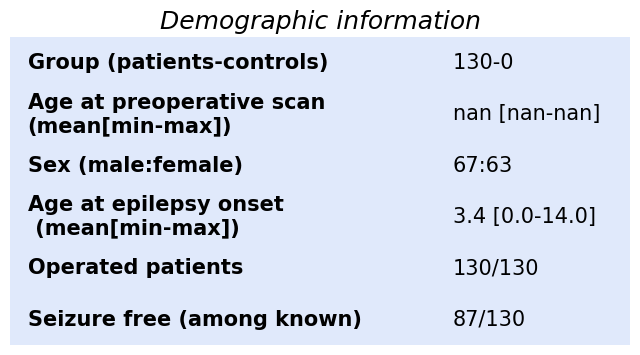

In [55]:
# create table 

fig, ax = plt.subplots(figsize=(8,4))
rows = 6
cols = 2
ax.set_ylim(-0.5, rows-0.5 )
ax.set_xlim(-0.5, cols + 1)

# data 
data = [
    {'name':'Seizure free (among known)', 'value': '{}/{}'.format(seizure_free, num_known)},
    {'name':'Operated patients', 'value': '{}/{}'.format(operated, num_known_operated)},
    {'name':'Age at epilepsy onset \n (mean[min-max])','value': '{:.1f} [{:.1f}-{:.1f}]'.format(mean_age_onset, min_age_onset, max_age_onset)},
    {'name':'Sex (male:female)', 'value':'{}:{}'.format(int(num_male), int(num_female))},
    {'name':'Age at preoperative scan \n(mean[min-max])', 'value': '{:.1f} [{:.1f}-{:.1f}]'.format(mean_age, min_age, max_age)},
    {'name':'Group (patients-controls)', 'value':  '{}-{} '.format(int(num_patients), int(num_controls))},
    {'name':'Number of subjects', 'value':'{} patients'.format(num_subjects)},
]

for row in range(rows):
    d = data[row]
    ax.text(x=-0.4, y=row, s=d['name'], va='center', ha='left', weight='bold', fontsize=15)
    ax.text(x=2, y=row, s=d['value'], va='center', ha='left', fontsize=15)
#add rectangle
rect = patches.Rectangle((-0.5,-0.5 ),  # bottom left starting position (x,y)
                         5,  # width
                         6,  # height
                         ec='none',
                         fc='cornflowerblue',
                         alpha=.2,
                         zorder=-1)
ax.add_patch(rect)
ax.set_title('Demographic information',loc='center',fontsize=18,style='italic')

ax.axis('off')

# Analyse pathologies

In [14]:
data_dictionary = {1: 'FCD 1' ,
                   2: 'FCD 2A',
                   3: 'FCD 2B',
                   4: 'FCD 3A',
                   5: 'FCD 3B',
                   6: 'FCD 3C',
                   7: 'FCD 3D',
                   8: 'FCD 2 not otherwise specified',
                   9: 'FCD not otherwise specified',
                   10: 'Hippocampal sclerosis',
                   11: 'Hippocampal gliosis only',
                   12: 'Cortical gliosis only', 
                   13: 'DNET',
                   14: 'Ganglioglioma',
                   15: 'other low-grade tumour',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Non-specific pathology',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}

main_categories = {1: 'FCD' ,
                   2: 'FCD',
                   3: 'FCD',
                   4: 'FCD',
                   5: 'FCD',
                   6: 'FCD',
                   7: 'FCD',
                   8: 'FCD',
                   9: 'FCD',
                   10: 'HS and other',
                   11: 'HS and other',
                   12: 'Cortical gliosis only', 
                   13: 'DNET',
                   14: 'Ganglioglioma',
                   15: 'other low-grade tumour',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Non-specific pathology',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}


def apply_category(row):
    try:
        category = main_categories[int(row['histology'])]
    except:
        category = 'not classified yet'
    return category

list_categories = ['FCD', 'HS and other', 'Cortical gliosis only', 
                   'DNET', 'Ganglioglioma', ' other low-grade tumour',
                   'Polymicrogyria', 'Periventricular nodular heterotopia',
                   'Cavernoma', 'Non-specific pathology', 'Normal',
                   'Hypothalamic hamartoma', 'Other'
                  ]

/tmp/ipykernel_18526/1316922223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_category'] = df.apply(lambda row : apply_category(row), axis=1)
/tmp/ipykernel_18526/1316922223.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=15)


[Text(0, 0.0, '0.0'),
 Text(0, 10.0, '10.0'),
 Text(0, 20.0, '20.0'),
 Text(0, 30.0, '30.0'),
 Text(0, 40.0, '40.0'),
 Text(0, 50.0, '50.0')]

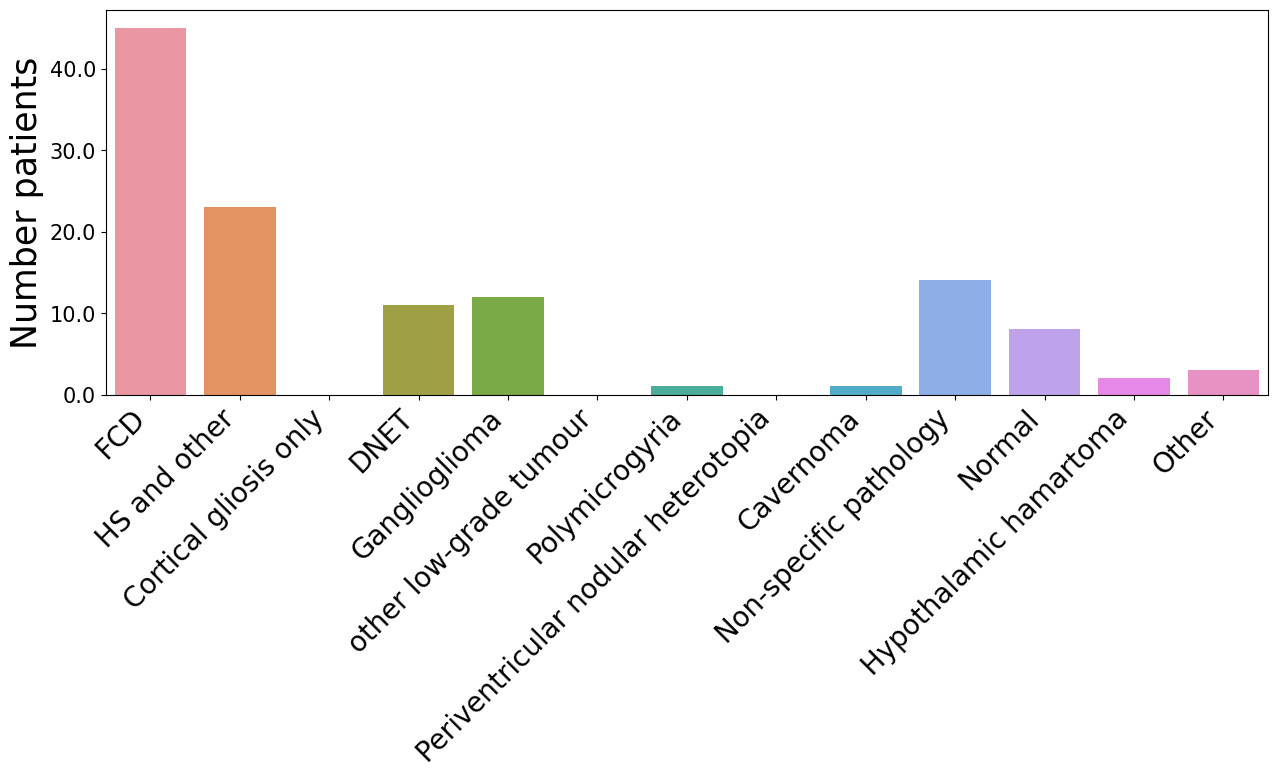

In [15]:
# recategorise histologies
df['main_category'] = df.apply(lambda row : apply_category(row), axis=1)

fig, ax = plt.subplots(figsize=(15,5))
g=sns.countplot(x='main_category', data=df, order=list_categories)
ax.set_ylabel('Number patients', fontsize=25)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)

In [16]:
# print('All histopathology')
# group_histo = df.groupby(['histology'])['id'].count()
# histos = np.array(group_histo.index)
# number_histo = np.array(group_histo)
# for histo, number in zip(histos, number_histo):
#     try:
#         histo_name = data_dictionary[int(histo)]
#     except:
#         histo_name = 'not classified yet'
#     print(f' {histo_name} : {number}')
# print('\n')


# print('Histopathology per categories')
# histo_categories = set(df['main_category'])
# for histo in histo_categories:
#     number = len(df[df['main_category']==histo])
#     print(f' {histo} : {number}')

# Analyse MRI data

In [36]:
# Define a function that finds the nifti scans, which are in gz format, 
# and return the type of scan among T1-mprage and FLAIR

def get_nii(row):
    #T1 modalities
    if 'postop_T1w' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'Postop T1w'
    elif 'preop_T1w' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'T1w'
    elif 'preop_T2w' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'T2w'
    elif 'preop_DWInegPE' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'DWI'
    elif 'preop_FLAIR' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'FLAIR'
    elif 'preop_2DFLAIR' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'FLAIR'
    elif 'MASK' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'Lesion mask'
    elif 'mask' in row['scan_name'] and '.nii' in row['scan_name']:
        return 'Lesion mask'
    else:
        pass

def harmonise_bids_name(name):
    split = name.split('_')  
    #change FCD by P
    split = ['P' if x=='FCD' else x for x in split]
    #remove scanner information
    list_exclude = ["3T", "7T", "15T"]
    for l in list_exclude:
        try:
            split.remove(l)
        except:
            pass
    # exclude specific characters
    harmo_name= ''.join(split)
    
    return harmo_name


In [37]:
folder = '/media/mathilde/MELD2/MELD2/DATA/MELD_H4/MELD_BIDS'

In [38]:
# Read in NiFTI file structure according to subject, scan type, and sequence name (which is produced by BIDS script)

data = []
for project_id in sorted(os.listdir(folder)):
    if 'sub' in project_id:
        for scan_type in sorted(os.listdir(folder + '/' + project_id)):
            for scan_name in sorted(os.listdir(folder + '/'+ project_id+'/'+scan_type)):
                data.append((project_id, scan_type, scan_name))
    else:
        pass

df_nifti_structure = pd.DataFrame(data, columns=['id', 'scan_type', 'scan_name'])

# Run get_nii function on each row in the dataframe, and create a new column in the dataframe called 'scan seq' that contains the sequence type of the scan
df_nifti_structure['scan_seq'] = df_nifti_structure.apply(lambda row:get_nii(row), axis=1)

# number of modality provided
df_nifti_structure.groupby(['scan_seq'])['id'].count()

scan_seq
DWI            100
FLAIR          113
Lesion mask     98
Postop T1w     112
T1w            157
T2w            144
Name: id, dtype: int64

In [39]:
df_nifti_structure

,id,scan_type,scan_name,scan_seq
0,sub-MELDH4P0001,anat,sub-MELDH4P0001_3T_preop_FLAIR.json,None
1,sub-MELDH4P0001,anat,sub-MELDH4P0001_3T_preop_FLAIR.nii.gz,FLAIR
2,sub-MELDH4P0001,anat,sub-MELDH4P0001_3T_preop_T1w.json,None
3,sub-MELDH4P0001,anat,sub-MELDH4P0001_3T_preop_T1w.nii.gz,T1w
4,sub-MELDH4P0001,dwi,sub-MELDH4P0001_3T_preop_DWI.bval,None
...,...,...,...,...
1895,sub-MELDH4P0222,anat,sub-MELDH4P0222_15T_preop_T2w.nii.gz,T2w
1896,sub-MELDH4P0231,dwi,sub-MELDH4P0231_3T_preop_DWI.bval,None
1897,sub-MELDH4P0231,dwi,sub-MELDH4P0231_3T_preop_DWI.bvec,None
1898,sub-MELDH4P0231,dwi,sub-MELDH4P0231_3T_preop_DWI.json,None


In [40]:
# only take subject that are included 
df['id_bids']= ['sub-'+harmonise_bids_name(name) for name in df['id']]
df_mris = df.merge(df_nifti_structure, left_on='id_bids', right_on='id')

/tmp/ipykernel_18526/2848197463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id_bids']= ['sub-'+harmonise_bids_name(name) for name in df['id']]


(-0.5, 0.5, -0.5, 6.5)

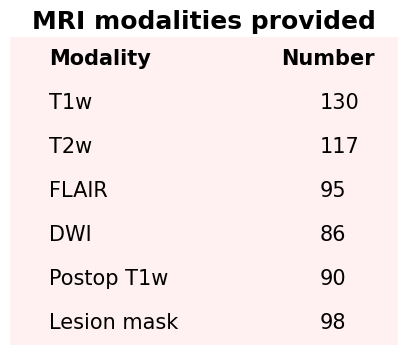

In [41]:
# create table 

modalities = ['T1w','T2w','FLAIR', 'DWI', 'Postop T1w', 'Lesion mask']

fig, ax = plt.subplots(figsize=(5,4))
rows = len(modalities)
cols = 1
ax.set_ylim(-0.5, rows+0.5)
ax.set_xlim(-0.5, cols - 0.5)

# data 

data = [{'mod':'modality', 'value':'number'},]
for row, modality in enumerate(modalities[::-1]) :
    num = len(df_mris[df_mris['scan_seq']==modality])
    ax.text(x=-0.4, y=row, s=modality, va='center', ha='left', fontsize=15)
    ax.text(x=0.3, y=row, s=int(num), va='center', ha='left', fontsize=15)
ax.text(x=-0.4, y=row+1, s='Modality', va='center', ha='left', weight='bold', fontsize=15)
ax.text(x=0.2, y=row+1, s='Number', va='center', ha='left', weight='bold', fontsize=15)
#add rectangle
rect = patches.Rectangle((-0.5,-0.5 ),  # bottom left starting position (x,y)
                         1,  # width
                         7,  # height
                         ec='none',
                         fc='lightpink',
                         alpha=.2,
                         zorder=-1)
ax.add_patch(rect)
ax.set_title('MRI modalities provided',loc='center',fontsize=18,weight='bold')

ax.axis('off')

## Plot lesion location

In [42]:
def harmonise_bids_name(name):
    split = name.split('_')  
    #change FCD by P
    split = ['P' if x=='FCD' else x for x in split]
    #remove scanner information
    list_exclude = ["3T", "7T", "15T"]
    for l in list_exclude:
        try:
            split.remove(l)
        except:
            pass
    # exclude specific characters
    harmo_name= ''.join(split)
    
    return harmo_name

In [43]:
# load info histo
import pandas as pd
import nibabel as nb
from skimage.transform import resize

data_dir = '/media/mathilde/MELD2/MELD2/DATA/MELD_H4/MELD_BIDS_mni'
hippo_mni_template = '../data/template/{}_hippo.nii.gz'
mni_template = '../data/template/mni_icbm152_t1_tal_nlin_sym_09a_brain.nii'

#resample hippo template
left_hippo = nb.load(hippo_mni_template.format('left')).get_fdata()
right_hippo = nb.load(hippo_mni_template.format('right')).get_fdata()
data_ref = nb.load(mni_template).get_fdata()
left_hippo = resize(left_hippo, data_ref.shape)
right_hippo = resize(right_hippo, data_ref.shape)

df_clinical = pd.read_csv('/media/mathilde/MELD2/MELD2/DATA/MELD_H4/MELDProjectFocalEpil_REDCAPDATA_H4_230516.csv') 
df_include = df_clinical[df_clinical['included']==1].copy()
subjects_included= np.array(df_include['id'].values)

# marker= 'lesion_mask'
marker= 'lesion mask done'
mask_exist = np.array((df_include[marker].astype('str')=='1'))
mask_hs =  np.array((df_include[marker].astype('str')=='0')&(df_include['histology']=='10'))



In [44]:
print(mask_exist.sum())

96


In [45]:
print(mask_hs.sum())

19


In [46]:
# load lesion masks

data=[]

for i,subject in enumerate(subjects_included):

    subject_bids = 'sub-'+harmonise_bids_name(subject)
    data_dir_subj = os.path.join(data_dir,subject_bids)

    if mask_exist[i]:
        lesion_mask_MNI = os.path.join(data_dir_subj, f'{subject_bids}_lesionmask_in_MNI.nii.gz')
        mask = nb.load(lesion_mask_MNI).get_fdata()
    elif mask_hs[i]:
        hemi = df_clinical[df_clinical['id']==subject]['hemi'].values[0]
        if hemi=='left':
            mask = left_hippo
        elif hemi =='right':
            mask = right_hippo
        else:
            mask = np.zeros(data_ref.shape)
    else:
        print(f'mask does not exist and subject {subject} is not HS')
        
    data.append(mask)


mask does not exist and subject MELD_H4_P_0003 is not HS
mask does not exist and subject MELD_H4_P_0030 is not HS
mask does not exist and subject MELD_H4_P_0064 is not HS
mask does not exist and subject MELD_H4_P_0094 is not HS
mask does not exist and subject MELD_H4_P_0097 is not HS
mask does not exist and subject MELD_H4_P_0103 is not HS
mask does not exist and subject MELD_H4_P_0107 is not HS
mask does not exist and subject MELD_H4_P_0108 is not HS
mask does not exist and subject MELD_H4_P_0124 is not HS
mask does not exist and subject MELD_H4_P_0151 is not HS
mask does not exist and subject MELD_H4_P_0155 is not HS
mask does not exist and subject MELD_H4_P_0157 is not HS
mask does not exist and subject MELD_H4_P_0175 is not HS
mask does not exist and subject MELD_H4_P_0176 is not HS
mask does not exist and subject MELD_H4_P_0177 is not HS


In [47]:
#sum lesion mask and save nifti
sum_lesion_file =  os.path.join(data_dir,'sum_lesion_mask.nii.gz')

#sum lesion mask

data=np.array(data)
data_sum = data.sum(axis=0)
data_sum.shape

#save as nifti
template = nb.load(mni_template)
new_img = nb.Nifti1Image(data_sum, template.affine, template.header)
nb.save(new_img, sum_lesion_file)


#sum lesion mask WITHOUT HS and save nifti
sum_lesion_file_noHS =  os.path.join(data_dir,'sum_lesion_mask_noHS.nii.gz')

#sum lesion mask
data=np.array(data)
data_sum = data[~mask_hs].sum(axis=0)
data_sum.shape

#save as nifti
template = nb.load(mni_template)
new_img = nb.Nifti1Image(data_sum, template.affine, template.header)
nb.save(new_img, sum_lesion_file_noHS)

Text(0.5, 1.0, 'Location of lesions ')

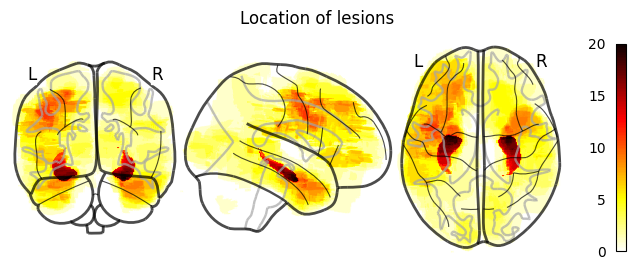

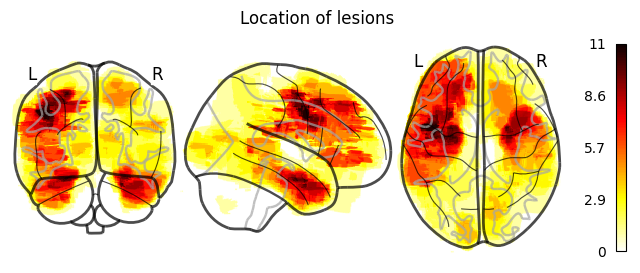

In [48]:
# plot lesion mask
from nilearn import plotting
import matplotlib.pyplot as plt


fig,ax1 = plt.subplots(figsize=(8,3))

plotting.plot_glass_brain(sum_lesion_file, colorbar=True, axes=ax1)
ax1.set_title('Location of lesions ')

fig,ax2 = plt.subplots(figsize=(8,3))

plotting.plot_glass_brain(sum_lesion_file_noHS, colorbar=True, axes=ax2)
ax2.set_title('Location of lesions ')

## Make report

In [49]:
site_code ='H4'

save_file=f'/media/mathilde/MELD2/MELD2/DATA/MELD_{site_code}/summary_report_{site_code}_230516.png'

/tmp/ipykernel_18526/1970209659.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ax4.get_yticks().astype('int'), fontsize=15)


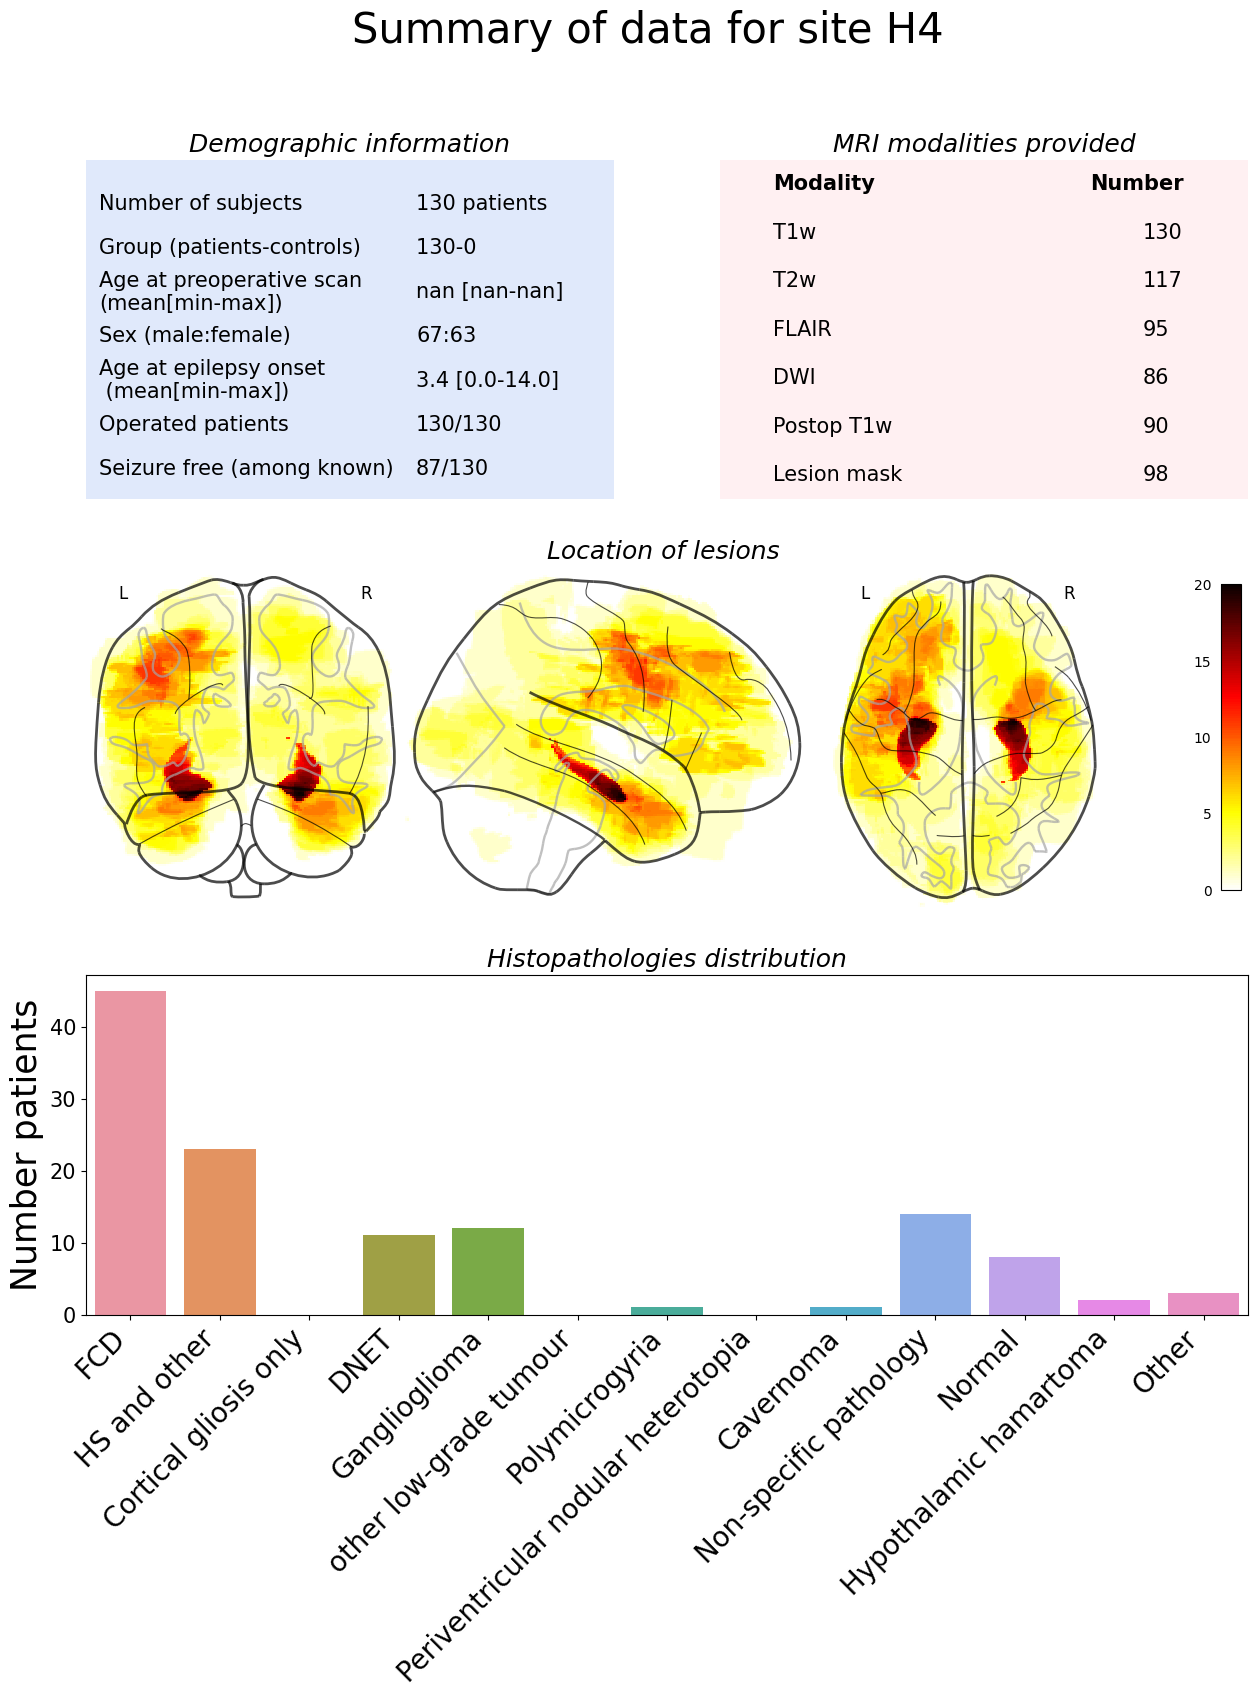

In [57]:
fig = plt.figure(figsize=(15,15))
fig.suptitle(f"Summary of data for site {site_code}", fontsize = 30)

gs = GridSpec(3, 2 , height_ratios=[2, 2, 2])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0:2])
ax4 = fig.add_subplot(gs[2,0:2])

##-------------------------------------------------------------
# summary demographics

ax1.set_title('Demographic information',loc='center',fontsize=18, style='italic')
rows = 7
cols = 2
ax1.set_ylim(-0.7, rows )
ax1.set_xlim(-0.5, cols + 1.5)

# data 
data = [
    {'name':'Seizure free (among known)', 'value': '{}/{}'.format(seizure_free, num_known)},
    {'name':'Operated patients', 'value': '{}/{}'.format(operated, num_known_operated)},
    {'name':'Age at epilepsy onset \n (mean[min-max])','value': '{:.1f} [{:.1f}-{:.1f}]'.format(mean_age_onset, min_age_onset, max_age_onset)},
    {'name':'Sex (male:female)', 'value':'{}:{}'.format(int(num_male), int(num_female))},
    {'name':'Age at preoperative scan \n(mean[min-max])', 'value': '{:.1f} [{:.1f}-{:.1f}]'.format(mean_age, min_age, max_age)},
    {'name':'Group (patients-controls)', 'value':  '{}-{} '.format(int(num_patients), int(num_controls))},
    {'name':'Number of subjects', 'value':'{} patients'.format(num_subjects)},
]

for row in range(rows):
    d = data[row]
    ax1.text(x=-0.4, y=row, s=d['name'], va='center', ha='left', fontsize=15)
    ax1.text(x=2, y=row, s=d['value'], va='center', ha='left', fontsize=15)
#add rectangle
rect = patches.Rectangle((-0.5,-0.7 ),  # bottom left starting position (x,y)
                         5,  # width
                         8,  # height
                         ec='none',
                         fc='cornflowerblue',
                         alpha=.2,
                         zorder=-1)
ax1.add_patch(rect)
ax1.axis('off')

##-------------------------------------------------------------
# summary MRI data

modalities = ['T1w','T2w','FLAIR', 'DWI', 'Postop T1w', 'Lesion mask']

rows = len(modalities)
cols = 1
ax2.set_ylim(-0.5, rows+0.5)
ax2.set_xlim(-0.5, cols - 0.5)

for row, modality in enumerate(modalities[::-1]) :
    num = len(df_mris[df_mris['scan_seq']==modality])
    ax2.text(x=-0.4, y=row, s=modality, va='center', ha='left', fontsize=15)
    ax2.text(x=0.3, y=row, s=int(num), va='center', ha='left', fontsize=15)
ax2.text(x=-0.4, y=row+1, s='Modality', va='center', ha='left', weight='bold', fontsize=15)
ax2.text(x=0.2, y=row+1, s='Number', va='center', ha='left', weight='bold', fontsize=15)
#add rectangle
rect = patches.Rectangle((-0.5,-0.5 ),  # bottom left starting position (x,y)
                         1,  # width
                         7,  # height
                         ec='none',
                         fc='lightpink',
                         alpha=.2,
                         zorder=-1)
ax2.add_patch(rect)
ax2.set_title('MRI modalities provided',loc='center',fontsize=18, style='italic')
ax2.axis('off')


##-------------------------------------------------------------
# plot lesion location

plotting.plot_glass_brain(sum_lesion_file, colorbar=True, axes=ax3)
ax3.set_title('Location of lesions ', loc='center',fontsize=18, style='italic')


##-------------------------------------------------------------
# plot graph histopathologies
g=sns.countplot(x='main_category', data=df, order=list_categories, ax = ax4)
ax4.set_ylabel('Number patients', fontsize=25)
ax4.set_xlabel('')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
ax4.set_yticklabels(ax4.get_yticks().astype('int'), fontsize=15)
ax4.set_title('Histopathologies distribution', loc='center',fontsize=18, style='italic')

# plt.tight_layout()

fig.savefig(save_file)



